In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import brewer2mpl
import json
import sys
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

%matplotlib inline

In [2]:
bmap = brewer2mpl.get_map("Set2", "qualitative", 7)                                                                                                                                                                                                                                                                          
colors = bmap.colors
Lcolors = colors[0:6]

for i in range(6):
    color = [i/255. for i in Lcolors[i]]
    Lcolors[i] = color


In [3]:
def HausdorffScore(cfs1, cfs2):
    """
    compute the modified Hausdorff score for measuring the consistency between two sets of counterfactual explanations.
    Arguments:
        cfs1: the first set of counterfactual explanations.
        cfs2: the second set of counterfactual explanations.
    returns: 
        modified Hausdorff distance between two sets.
    """
    cfs1, cfs2 = np.array(cfs1), np.array(cfs2)
    pairwise_distance = cdist(cfs1, cfs2)
    h_A_B = pairwise_distance.min(1).mean()
    h_B_A = pairwise_distance.min(0).mean()

    return max(h_A_B, h_B_A)

def stat(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    d = len(data['data'][0][0])
    cf2 = data['cf2']

    def get_consistency(cf_data_list, cf2_data_list):
        if len(cf_data_list) > 0 and len(cf2_data_list) > 0:
            return HausdorffScore(cf_data_list, cf2_data_list)
        else:
            return -1

    results = {}


    for i in range(len(cf2)):
        cf2_list = cf2[i]
        for j in range(len(cf2_list)):
            item = cf2_list[j]
            result = results.get(item['sigma'], [])
            tmp_result = {**item}
            tmp_result['consistency'] = get_consistency(np.reshape(item['cf'], (-1, d)), np.reshape(item['cf2'], (-1, d)))
            result.append(tmp_result)
            results[item['sigma']] = result

    return results


def stat_cemsp(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    d = len(data['data'][0][0])
    cf2 = data['cf2']

    def get_consistency(cf_data_list, cf2_data_list):
        if len(cf_data_list) > 0 and len(cf2_data_list) > 0:
            return HausdorffScore(cf_data_list, cf2_data_list)
        else:
            return -1

    results = {}


    for i in range(len(cf2)):
        cf2_list = cf2[i]
        for j in range(len(cf2_list)):
            item = cf2_list[j]
            result = results.get(item['sigma'], [])
            tmp_result = {**item}
            tmp_result['consistency'] = get_consistency(np.reshape(item['cf'], (-1, d)), np.reshape(item['cf2'], (-1, d)))
            result.append(tmp_result)
            results[item['sigma']] = result

    return results

In [4]:
synthetic_gs = "../cfgen/synthetic/synthetic_growingsphere_sigma.json"
synthetic_cfproto = "../cfgen/synthetic/synthetic_cfproto_sigma.json"
synthetic_plaincf = "../cfgen/synthetic/synthetic_plaincf_sigma.json"
synthetic_dice = "../cfgen/synthetic/synthetic_dice_sigma.json"
synthetic_sns = "../consistency/code/synthetic_sns_sigma.json"
synthetic_cemsp = "../cfgen/synthetic/synthetic_cemsp_sigma.json"

syn_gs_results = stat(synthetic_gs)
syn_cfproto_results = stat(synthetic_cfproto)
syn_plaincf_results = stat(synthetic_plaincf)
syn_dice_results = stat(synthetic_dice)
syn_sns_results = stat(synthetic_sns)
syn_cemsp_results = stat_cemsp(synthetic_cemsp)

In [5]:
thyroid_gs = "../cfgen/thyroid/thyroid_growingsphere_sigma.json"
thyroid_cfproto = "../cfgen/thyroid/Thyroid_cfproto_sigma.json"
thyroid_plaincf = "../cfgen/thyroid/thyroid_plaincf_sigma.json"
thyroid_dice = "../cfgen/thyroid/thyroid_dice_sigma.json"
thyroid_sns = "../consistency/code/thyroid_sns_sigma.json"
thyroid_cemsp = "../cfgen/thyroid/thyroid_cemsp_sigma.json"

thyroid_gs_results = stat(thyroid_gs)
thyroid_cfproto_results = stat(thyroid_cfproto)
thyroid_plaincf_results = stat(thyroid_plaincf)
thyroid_dice_results = stat(thyroid_dice)
thyroid_sns_results = stat(thyroid_sns)
thyroid_cemsp_results = stat_cemsp(thyroid_cemsp)

In [6]:
hepatitis_gs = "../cfgen/hepatitis/Hepatitis_growingsphere_sigma.json"
hepatitis_cfproto = "../cfgen/hepatitis/Hepatitis_cfproto_sigma.json"
hepatitis_plaincf = "../cfgen/hepatitis/Hepatitis_plaincf_sigma.json"
hepatitis_dice = "../cfgen/hepatitis/Hepatitis_dice_sigma.json"
hepatitis_sns = "../consistency/code/hepatitis_sns_sigma.json"
hepatitis_cemsp = "../cfgen/hepatitis/Hepatitis_cemsp_sigma.json"

hepatitis_gs_results = stat(hepatitis_gs)
hepatitis_cfproto_results = stat(hepatitis_cfproto)
hepatitis_plaincf_results = stat(hepatitis_plaincf)
hepatitis_dice_results = stat(hepatitis_dice)
hepatitis_sns_results = stat(hepatitis_sns)
hepatitis_cemsp_results = stat_cemsp(hepatitis_cemsp)

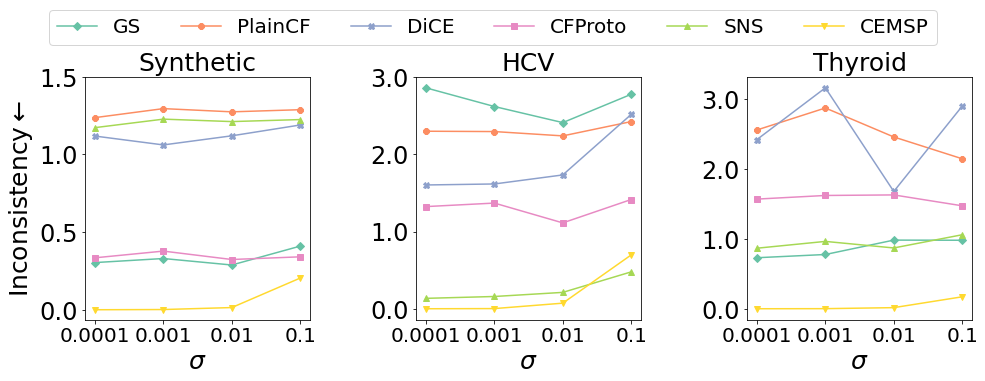

In [11]:
from matplotlib.ticker import FormatStrFormatter
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
plt.rcParams['xtick.labelsize']= 20
plt.rcParams['ytick.labelsize']= 20

alpha = 0.9
fontsize = 25
yfontsize = 24

def plot(axs, **kws):

    def get_con(results):
        consistency = []
        for k, v in results.items():
            con = []
            for item in v:
                if item['consistency'] != -1:
                    con.append(item['consistency'])
            consistency.append(np.mean(con))
        return consistency

    def draw_results(results, dataset, **kwargs):

        consistency = get_con(results)
        sigmas = [idx + 1 for idx, _ in enumerate(results)]
        axs.plot(sigmas, consistency, **kwargs, markersize=6)
        axs.set_title(dataset, fontsize=fontsize)

    markers = ['v', 's', 'X', 'D', '8', '^']

    dataset = kws['dataset']
    draw_results(kws['gs_results'], dataset, marker=markers[3], color=Lcolors[0], label='GS')
    draw_results(kws['plaincf_results'], dataset, marker=markers[4], color=Lcolors[1], label='PlainCF')
    draw_results(kws['dice_results'], dataset, marker=markers[2], color=Lcolors[2], label='DiCE')
    draw_results(kws['cfproto_results'], dataset, marker=markers[1], color=Lcolors[3], label='CFProto')
    draw_results(kws['sns_results'], dataset, marker=markers[5], color=Lcolors[4], label='SNS')
    draw_results(kws['cemsp_results'], dataset, marker=markers[0], color=Lcolors[5], label='CEMSP')


plot(axs[0], cemsp_results=syn_cemsp_results, cfproto_results=syn_cfproto_results, dice_results=syn_dice_results, gs_results=syn_gs_results, plaincf_results=syn_plaincf_results, sns_results=syn_sns_results, dataset='Synthetic')

plot(axs[1], cemsp_results=hepatitis_cemsp_results, cfproto_results=hepatitis_cfproto_results, dice_results=hepatitis_dice_results, gs_results=hepatitis_gs_results, plaincf_results=hepatitis_plaincf_results, sns_results=hepatitis_sns_results, dataset='HCV')



plot(axs[2], cemsp_results=thyroid_cemsp_results, cfproto_results=thyroid_cfproto_results, dice_results=thyroid_dice_results, gs_results=thyroid_gs_results, plaincf_results=thyroid_plaincf_results, sns_results=thyroid_sns_results, dataset='Thyroid')

axs[0].set_xticks([1,2,3,4])
axs[1].set_xticks([1,2,3,4])
axs[2].set_xticks([1,2,3,4])

axs[0].set_xticklabels([0.0001, 0.001, 0.01, 0.1])
axs[1].set_xticklabels([0.0001, 0.001, 0.01, 0.1])
axs[2].set_xticklabels([0.0001, 0.001, 0.01, 0.1])

from matplotlib.ticker import FormatStrFormatter

axs[0].set_yticks(np.arange(0, 1.6, 0.5))
axs[1].set_yticks(np.arange(0, 3.1, 1.0))
axs[2].set_yticks(np.arange(0, 3.1, 1))


axs[0].yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
axs[1].yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
axs[2].yaxis.set_major_formatter(FormatStrFormatter("%.1f"))

axs[0].set_ylabel(r'Inconsistency$\leftarrow$', fontsize=fontsize)

axs[0].set_xlabel(r'$\sigma$', fontsize=fontsize)
axs[1].set_xlabel(r'$\sigma$', fontsize=fontsize)
axs[2].set_xlabel(r'$\sigma$', fontsize=fontsize)


for i in range(3):
    axs[i].tick_params(axis='x', labelsize=20)
    axs[i].tick_params(axis='y', labelsize=yfontsize)


lines_labels = [axs[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels, loc='upper center', ncol=6, prop={'size':20})
plt.tight_layout(pad=5.5)
plt.savefig('sigma_test.pdf', dpi=1200, bbox_inches='tight')
plt.show()